<a href="https://colab.research.google.com/github/thanusree02/Natural-Language-Processing/blob/main/NLP_LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLTK Pipeline for Research Abstract Processing


In [1]:
!pip install nltk pandas matplotlib seaborn wordcloud

In [2]:
import pandas as pd
import nltk
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
df = pd.read_csv("/content/arxiv_data.csv", engine='python', on_bad_lines='skip')
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [8]:
df.columns

Index(['titles', 'summaries', 'terms'], dtype='object')

In [9]:
df = df[df['terms'].str.contains('cs',na=False)]
df = df.head(300)

Text Cleaning Function

In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [11]:
df['clean_abstract'] = df['summaries'].apply(clean_text)

Tokenization (NLTK)

In [12]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df['tokens'] = df['clean_abstract'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Stopword Removal

In [13]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['filtered_tokens'] = df['tokens'].apply(
    lambda x: [word for word in x if word not in stop_words]
)

Lemmatization

In [14]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['lemmatized_tokens'] = df['filtered_tokens'].apply(
    lambda x: [lemmatizer.lemmatize(word) for word in x]
)


Re-joining Lemmatized Words

In [15]:
df['clean_summaries'] = df['lemmatized_tokens'].apply(
    lambda x: " ".join(x)
)

In [16]:
df[['lemmatized_tokens', 'clean_summaries']].head()

,lemmatized_tokens,clean_summaries
0,"[stereo, matching, one, widely, used, techniqu...",stereo matching one widely used technique infe...
1,"[recent, advancement, artificial, intelligence...",recent advancement artificial intelligence ai ...
2,"[paper, proposed, novel, mutual, consistency, ...",paper proposed novel mutual consistency networ...
3,"[consistency, training, proven, advanced, semi...",consistency training proven advanced semisuper...
4,"[ensure, safety, automated, driving, correct, ...",ensure safety automated driving correct percep...


POS Tagging

In [17]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
df['pos_tags'] = df['lemmatized_tokens'].apply(nltk.pos_tag)
df[['pos_tags']].head()

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


,pos_tags
0,"[(stereo, NN), (matching, VBG), (one, CD), (wi..."
1,"[(recent, JJ), (advancement, JJ), (artificial,..."
2,"[(paper, NN), (proposed, VBN), (novel, JJ), (m..."
3,"[(consistency, NN), (training, VBG), (proven, ..."
4,"[(ensure, VB), (safety, NN), (automated, VBN),..."


Extract Noun Phrases (Chunking)

In [18]:
grammar = "NP: {<JJ>*<NN.*>+}"
chunk_parser = nltk.RegexpParser(grammar)

noun_phrases = []

for tags in df['pos_tags']:
    tree = chunk_parser.parse(tags)
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            noun_phrases.append(" ".join(word for word, pos in subtree.leaves()))

In [19]:
np_freq = Counter(noun_phrases)
np_freq.most_common(20)


[('method', 85),
 ('model', 62),
 ('image', 54),
 ('medical image segmentation', 52),
 ('data', 50),
 ('approach', 37),
 ('image segmentation', 37),
 ('performance', 30),
 ('medical image', 28),
 ('semantic segmentation', 27),
 ('datasets', 27),
 ('segmentation', 25),
 ('task', 23),
 ('network', 21),
 ('framework', 19),
 ('work', 17),
 ('result', 17),
 ('paper', 14),
 ('segmentation model', 14),
 ('strategy', 13)]

Visualize Top Noun Phrases

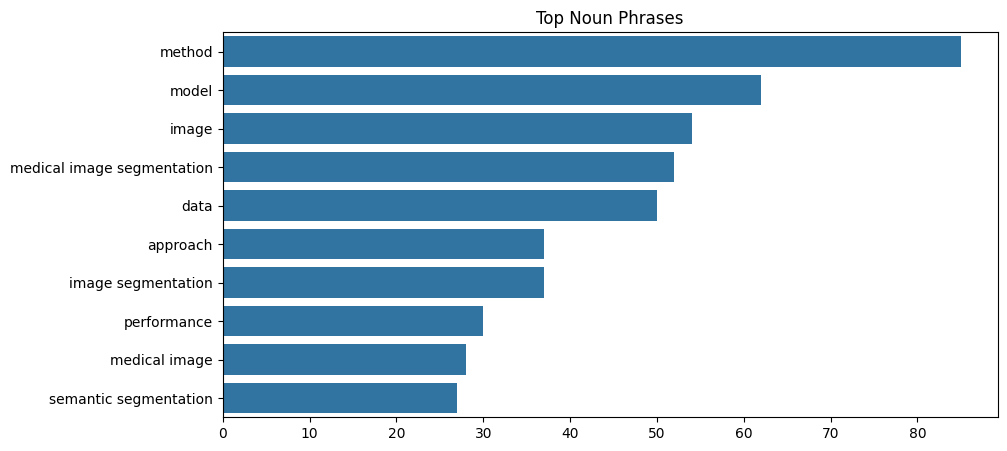

In [20]:
top_np = dict(np_freq.most_common(10))

plt.figure(figsize=(10,5))
sns.barplot(x=list(top_np.values()), y=list(top_np.keys()))
plt.title("Top Noun Phrases")
plt.show()


Named Entity Recognition (NLTK – Limited)





In [21]:
import nltk
from nltk import ne_chunk
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

entities = []

for text in df['summaries'][:100]:   # limit for speed
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    ne_tree = nltk.ne_chunk(pos_tags)

    for subtree in ne_tree:
        if hasattr(subtree, 'label'):
            entities.append(subtree.label())

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [23]:
print(Counter(entities))

Counter({'ORGANIZATION': 276, 'PERSON': 75, 'GPE': 61, 'GSP': 1})


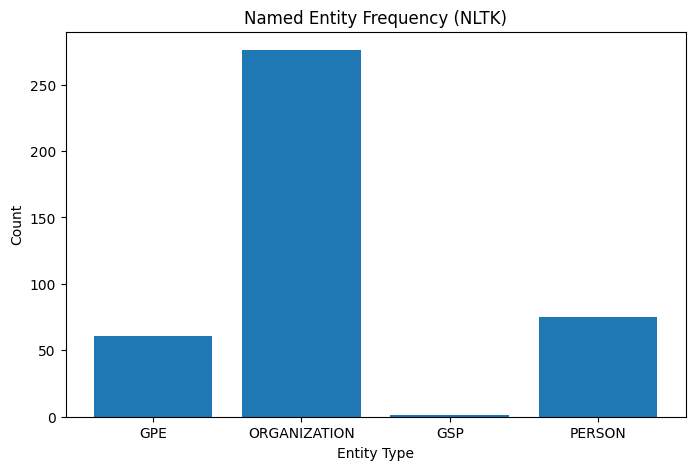

In [24]:
entity_freq = Counter(entities)

plt.figure(figsize=(8,5))
plt.bar(entity_freq.keys(), entity_freq.values())
plt.title("Named Entity Frequency (NLTK)")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.show()


WordCloud of Noun Phrases

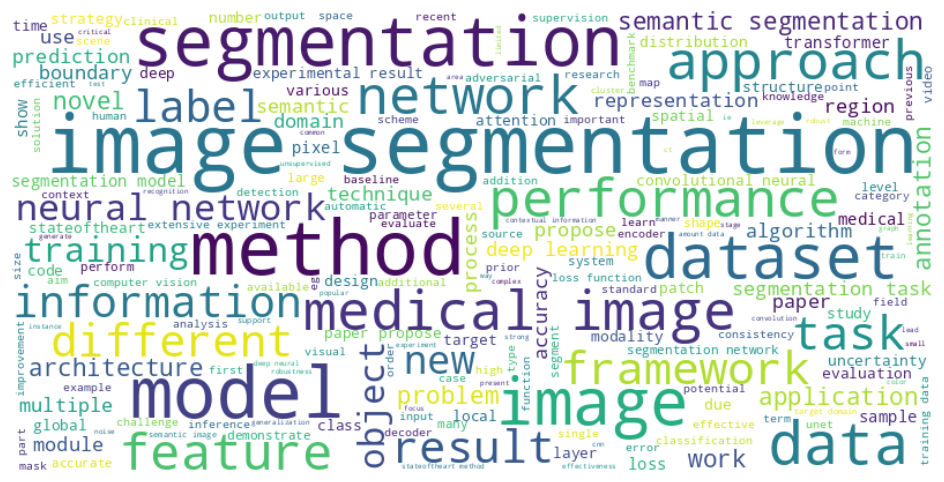

In [25]:
wc = WordCloud(width=800, height=400, background_color='white')
wc.generate(" ".join(noun_phrases))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

spaCy Text Preprocessing Pipeline

In [20]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [22]:
import spacy
import pandas as pd
import re


In [23]:
nlp = spacy.load("en_core_web_sm")


Data Loading (Kaggle CSV)

In [25]:
# Example: loading CSV file
df = pd.read_csv("/content/arxiv_data.csv", engine='python', on_bad_lines='skip')

# Check columns
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


Initial Text Preprocessing

In [48]:
import re

def initial_preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

sample_text = df["summaries"].iloc[0]
clean_text = initial_preprocess(sample_text)

print("Original Text:\n", sample_text)
print("\nAfter Regex Preprocessing:\n", clean_text)


Original Text:
 Stereo matching is one of the widely used techniques for inferring depth from
stereo images owing to its robustness and speed. It has become one of the major
topics of research since it finds its applications in autonomous driving,
robotic navigation, 3D reconstruction, and many other fields. Finding pixel
correspondences in non-textured, occluded and reflective areas is the major
challenge in stereo matching. Recent developments have shown that semantic cues
from image segmentation can be used to improve the results of stereo matching.
Many deep neural network architectures have been proposed to leverage the
advantages of semantic segmentation in stereo matching. This paper aims to give
a comparison among the state of art networks both in terms of accuracy and in
terms of speed which are of higher importance in real-time applications.

After Regex Preprocessing:
 stereo matching is one of the widely used techniques for inferring depth from stereo images owing to its ro

Word Tokenization (spaCy)

In [49]:
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp(clean_text)
tokens = [token.text for token in doc]

print("Tokens:\n", tokens)


Tokens:
 ['stereo', 'matching', 'is', 'one', 'of', 'the', 'widely', 'used', 'techniques', 'for', 'inferring', 'depth', 'from', 'stereo', 'images', 'owing', 'to', 'its', 'robustness', 'and', 'speed', 'it', 'has', 'become', 'one', 'of', 'the', 'major', 'topics', 'of', 'research', 'since', 'it', 'finds', 'its', 'applications', 'in', 'autonomous', 'driving', 'robotic', 'navigation', 'd', 'reconstruction', 'and', 'many', 'other', 'fields', 'finding', 'pixel', 'correspondences', 'in', 'nontextured', 'occluded', 'and', 'reflective', 'areas', 'is', 'the', 'major', 'challenge', 'in', 'stereo', 'matching', 'recent', 'developments', 'have', 'shown', 'that', 'semantic', 'cues', 'from', 'image', 'segmentation', 'can', 'be', 'used', 'to', 'improve', 'the', 'results', 'of', 'stereo', 'matching', 'many', 'deep', 'neural', 'network', 'architectures', 'have', 'been', 'proposed', 'to', 'leverage', 'the', 'advantages', 'of', 'semantic', 'segmentation', 'in', 'stereo', 'matching', 'this', 'paper', 'aims', 

Stopword Removal (spaCy)

In [50]:
filtered_tokens = [
    token.text for token in doc
    if not token.is_stop and not token.is_punct
]

print("After Stopword Removal:\n", filtered_tokens)


After Stopword Removal:
 ['stereo', 'matching', 'widely', 'techniques', 'inferring', 'depth', 'stereo', 'images', 'owing', 'robustness', 'speed', 'major', 'topics', 'research', 'finds', 'applications', 'autonomous', 'driving', 'robotic', 'navigation', 'd', 'reconstruction', 'fields', 'finding', 'pixel', 'correspondences', 'nontextured', 'occluded', 'reflective', 'areas', 'major', 'challenge', 'stereo', 'matching', 'recent', 'developments', 'shown', 'semantic', 'cues', 'image', 'segmentation', 'improve', 'results', 'stereo', 'matching', 'deep', 'neural', 'network', 'architectures', 'proposed', 'leverage', 'advantages', 'semantic', 'segmentation', 'stereo', 'matching', 'paper', 'aims', 'comparison', 'state', 'art', 'networks', 'terms', 'accuracy', 'terms', 'speed', 'higher', 'importance', 'realtime', 'applications']


Lemmatization (spaCy)

In [51]:
lemmatized_tokens = [
    token.lemma_ for token in doc
    if not token.is_stop and not token.is_punct and token.lemma_ != "-PRON-"
]

print("After Lemmatization:\n", lemmatized_tokens)


After Lemmatization:
 ['stereo', 'matching', 'widely', 'technique', 'infer', 'depth', 'stereo', 'image', 'owe', 'robustness', 'speed', 'major', 'topic', 'research', 'find', 'application', 'autonomous', 'drive', 'robotic', 'navigation', 'd', 'reconstruction', 'field', 'find', 'pixel', 'correspondence', 'nontextured', 'occlude', 'reflective', 'area', 'major', 'challenge', 'stereo', 'matching', 'recent', 'development', 'show', 'semantic', 'cue', 'image', 'segmentation', 'improve', 'result', 'stereo', 'matching', 'deep', 'neural', 'network', 'architecture', 'propose', 'leverage', 'advantage', 'semantic', 'segmentation', 'stereo', 'matching', 'paper', 'aim', 'comparison', 'state', 'art', 'network', 'term', 'accuracy', 'term', 'speed', 'high', 'importance', 'realtime', 'application']


Rejoining Words

In [52]:
rejoined_text = " ".join(lemmatized_tokens)
print("After Rejoining Words:\n", rejoined_text)


After Rejoining Words:
 stereo matching widely technique infer depth stereo image owe robustness speed major topic research find application autonomous drive robotic navigation d reconstruction field find pixel correspondence nontextured occlude reflective area major challenge stereo matching recent development show semantic cue image segmentation improve result stereo matching deep neural network architecture propose leverage advantage semantic segmentation stereo matching paper aim comparison state art network term accuracy term speed high importance realtime application


Unified spaCy Preprocessing Pipeline Function

In [53]:
def spacy_preprocess_pipeline(text):
    text = initial_preprocess(text)
    doc = nlp(text)
    tokens = [
        token.lemma_
        for token in doc
        if not token.is_stop and not token.is_punct and token.lemma_ != "-PRON-"
    ]
    return " ".join(tokens)


paCy + NLTK TEXT PREPROCESSING CODE

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk

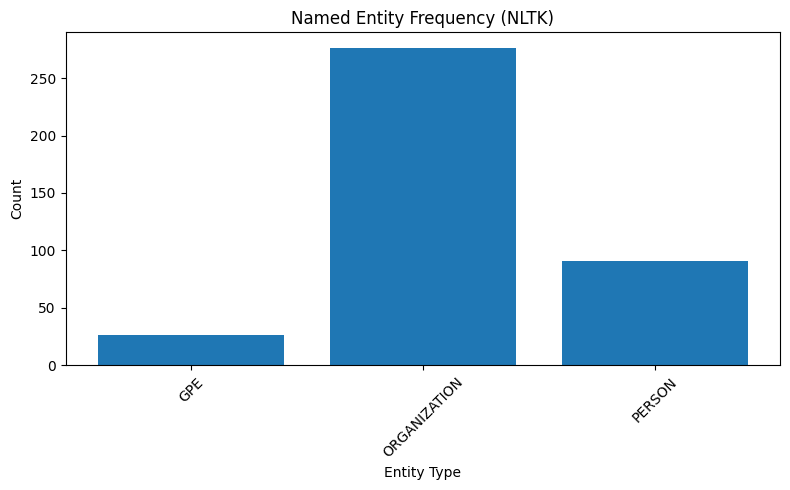

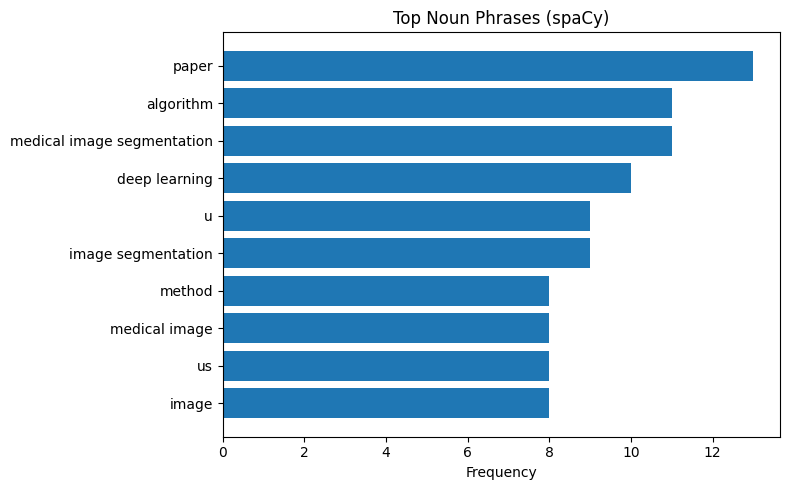

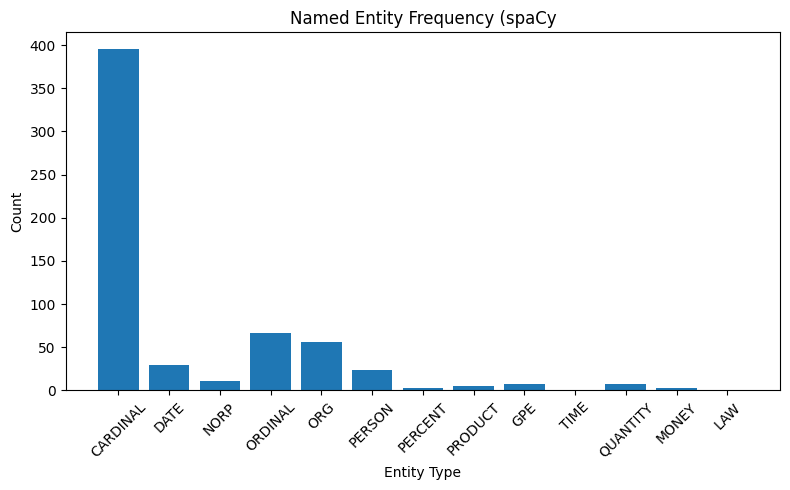


Top Noun Phrases (spaCy):
paper : 13
algorithm : 11
medical image segmentation : 11
deep learning : 10
u : 9
image segmentation : 9
method : 8
medical image : 8
us : 8
image : 8

Top Technical Terms (spaCy Matcher):
medical image : 137
semantic segmentation : 57
deep learning : 43
neural network : 37
extensive experiment : 20
experimental result : 20
long range : 20
contextual information : 20
real world : 16
contrastive learning : 16


In [65]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter

# NLTK imports
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk

# spaCy imports
import spacy
from spacy.matcher import Matcher

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Added this line
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('maxent_ne_chunker_tab') # Added this line to download the missing resource

# Load spaCy model
nlp = spacy.load("en_core_web_sm")


# =========================================
# 2. LOAD DATASET
# =========================================
df = pd.read_csv("arxiv_data.csv", engine="python", nrows=1000)
df = df[['summaries']].dropna()


# =========================================
# 3. NLTK TEXT PREPROCESSING PIPELINE
# =========================================
def nltk_preprocessing_pipeline(text):
    # Remove URLs, HTML, mentions, hashtags
    text = re.sub(r"http\S+|www\S+|<.*?>|@\w+|#\w+", " ", text)
    # Lowercase
    text = text.lower()
    # Remove emojis & special characters
    text = re.sub(r"[^\w\s]", " ", text)
    # Normalize spaces
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Stopword removal
    stop_words = set(stopwords.words("english"))
    tokens = [w for w in tokens if w not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    return " ".join(tokens)


# Apply NLTK pipeline
df["clean_summaries"] = df["summaries"].apply(nltk_preprocessing_pipeline)


# =========================================
# 4. NLTK NAMED ENTITY RECOGNITION
# =========================================
combined_text = " ".join(df["summaries"].head(100))

tokens = word_tokenize(combined_text)
pos_tags = pos_tag(tokens)
chunked = ne_chunk(pos_tags)

nltk_entities = []
for chunk in chunked:
    if hasattr(chunk, "label"):
        nltk_entities.append(chunk.label())

nltk_entity_freq = Counter(nltk_entities)


# =========================================
# 5. NLTK ENTITY FREQUENCY VISUALIZATION
# =========================================
plt.figure(figsize=(8, 5))
plt.bar(nltk_entity_freq.keys(), nltk_entity_freq.values())
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.title("Named Entity Frequency (NLTK)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# =========================================
# 6. spaCy PIPELINE PROCESSING
# =========================================
docs = list(nlp.pipe(df["clean_summaries"].head(200)))


# =========================================
# 7. spaCy NOUN PHRASE EXTRACTION
# =========================================
noun_phrases = []
for doc in docs:
    for chunk in doc.noun_chunks:
        noun_phrases.append(chunk.text.lower())

noun_phrase_freq = Counter(noun_phrases).most_common(10)


# =========================================
# 8. spaCy NOUN PHRASE VISUALIZATION
# =========================================
labels, values = zip(*noun_phrase_freq)

plt.figure(figsize=(8, 5))
plt.barh(labels, values)
plt.xlabel("Frequency")
plt.title("Top Noun Phrases (spaCy)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# =========================================
# 9. spaCy NAMED ENTITY RECOGNITION
# =========================================
spacy_entities = []
for doc in docs:
    for ent in doc.ents:
        spacy_entities.append(ent.label_)

spacy_entity_freq = Counter(spacy_entities)


# =========================================
# 10. spaCy ENTITY FREQUENCY VISUALIZATION
# =========================================
plt.figure(figsize=(8, 5))
plt.bar(spacy_entity_freq.keys(), spacy_entity_freq.values())
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.title("Named Entity Frequency (spaCy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# =========================================
# 11. spaCy MATCHER FOR TECHNICAL TERMS
# =========================================
matcher = Matcher(nlp.vocab)

# Pattern: Adjective + Noun (e.g., deep learning, neural network)
pattern = [
    {"POS": "ADJ"},
    {"POS": "NOUN"}
]

matcher.add("TECH_TERM", [pattern])

matched_terms = []
for doc in docs:
    matches = matcher(doc)
    for match_id, start, end in matches:
        matched_terms.append(doc[start:end].text.lower())

tech_term_freq = Counter(matched_terms).most_common(10)


# =========================================
# 12. OUTPUT RESULTS
# =========================================
print("\nTop Noun Phrases (spaCy):")
for term, freq in noun_phrase_freq:
    print(term, ":", freq)

print("\nTop Technical Terms (spaCy Matcher):")
for term, freq in tech_term_freq:
    print(term, ":", freq)
